<a href="https://colab.research.google.com/github/abhishekkrhansda/EDA-ON-SALES-DATA/blob/main/EDA_ON_SALES_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhishekhansda","key":"72a1c8c752ef09ff85293bf3fa432128"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download dhruvkothari19/practice-eda-on-this-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/dhruvkothari19/practice-eda-on-this-sales-dataset
License(s): unknown
practice-eda-on-this-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = "/content/practice-eda-on-this-sales-dataset.zip"
zip_object = ZipFile(file=dataset, mode="r")
zip_object.extractall("./")
zip_object.close

print("extracted")

extracted


In [ ]:
import pandas as pd
import os

path = "/content"   # change if needed

all_data = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):   # ✅ only read csv files
        df = pd.read_csv(os.path.join(path, file))
        all_data = pd.concat([all_data, df])

all_data.to_csv("all_data.csv", index=False)




In [ ]:
df = pd.read_csv("/content/all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


length of data

In [ ]:
len(df)

373700

In [ ]:
df.shape

(373700, 6)

CHECK FOR NULL

In [ ]:
df.isnull().sum()

,0
Order ID,1090
Product,1090
Quantity Ordered,1090
Price Each,1090
Order Date,1090
Purchase Address,1090


TOTAL NULL

In [ ]:
total_no_null = df.isnull().sum().sum()
print(total_no_null)

6540


DUPLICATE

In [ ]:
duplicate = df.duplicated().sum()
print(duplicate)

188012


CHECK FOR DATA WHY THEY ARE NULL OR DUPLICATE

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
373695,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
373696,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
373697,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
373698,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


THE DATA IS DUPLICATE BECAUSE OF THE QUANTITY AND SAME PRODUCT BOUGHT BY OTHER COSTUMER AS WELL


In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
df.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object


REMOVE ALL NULL

In [ ]:
df.dropna(inplace = True)

Order ID	object
Product	object
Quantity Ordered	object
Price Each	object
Order Date	object
Purchase Address	object
CONVERT ORDERID < QUANTITY ORDERED < PRICE < to NUMERIC

In [ ]:
def remove_non_numeric_rows(df, column_name):

    mask = df[column_name].astype(str).str.match(r'^\d+(\.\d+)?$', na=False)

    df.drop(df.index[~mask], inplace=True)

    df[column_name] = pd.to_numeric(df[column_name])
    return df


In [ ]:
remove_non_numeric_rows(df,'Order ID')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
373695,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001"
373696,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016"
373697,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035"
373698,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001"


REMOVE QUANTITY ORDERED , PRICE OF EACH AND DATE

In [ ]:
remove_non_numeric_rows(df,'Quantity Ordered')
remove_non_numeric_rows(df,'Price Each')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
373695,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001"
373696,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016"
373697,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035"
373698,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001"


CHANGE DATE TO PD.DATE_TIME

In [ ]:
def clean_date(df, column_name):

   df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
   mask = df[df[column_name].notna()]

   return df




In [ ]:
clean_date(df,'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
373695,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001"
373696,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016"
373697,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035"
373698,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001"


CHECK THERE DATATYPE ONCE MORE

In [ ]:
df.dtypes

,0
Order ID,int64
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,datetime64[ns]
Purchase Address,object


In [ ]:
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
373695,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001"
373696,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016"
373697,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035"
373698,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001"


MAKE NEW COLUMN AS CITY , STATE

In [ ]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2]).apply(lambda x: x.split(' ')[1])


In [ ]:
df['City']


,City
0,Seattle
1,Dallas
2,Portland
3,Los Angeles
4,New York City
...,...
373695,Dallas
373696,San Francisco
373697,Portland
373698,Los Angeles


In [ ]:
df['State']

,State
0,WA
1,TX
2,OR
3,CA
4,NY
...,...
373695,TX
373696,CA
373697,OR
373698,CA


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY


TOTAL PRICE OF OBJECT

In [ ]:
df['Total Price'] = df['Quantity Ordered'] * df['Price Each']

In [ ]:
df['Total Price']

,Total Price
0,23.98
1,99.99
2,700.00
3,7.68
4,7.68
...,...
373695,109.99
373696,149.99
373697,999.99
373698,5.98


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Total Price
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA,23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX,99.99
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR,700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY,7.68


CHANGE ORDER DATE INTO MONTHS

In [ ]:
df['Month'] = df['Order Date'].dt.month

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Total Price,Month,Date,time
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA,23.98,8,2019-08-31,22:21:00
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX,99.99,8,2019-08-15,15:11:00
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR,700.00,8,2019-08-06,14:40:00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,7.68,8,2019-08-29,20:59:00
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY,7.68,8,2019-08-15,19:53:00


In [ ]:
df['Date'] = df['Order Date'].dt.date
df['Time'] = df['Order Date'].dt.time

NOW ALL THE DATA IS MADE USING EXPLORATORY DATA ANALLYSIS

**NOW WE WILL SOLVE THE QUESTONS**

Q1 ---> BEST MONTH FOR SALE AND HOW MUCH WAS EARNED THAT MONTH

In [ ]:
all_month_sales = df.groupby('Month')['Total Price'].sum()
best_month = all_month_sales.idxmax()
best_month_sales = max(all_month_sales)


print('best month sales', best_month_sales)
print('best month', best_month )

best month sales 9226886.68
best month 12


FOR VISUALIZATION

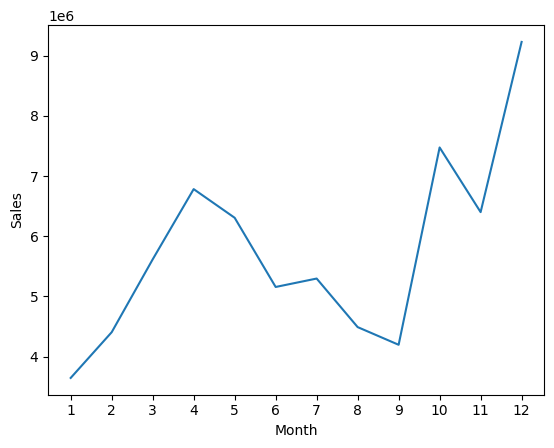

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(all_month_sales)
plt.xticks(all_month_sales.index)
plt.show()

BAR PLOT

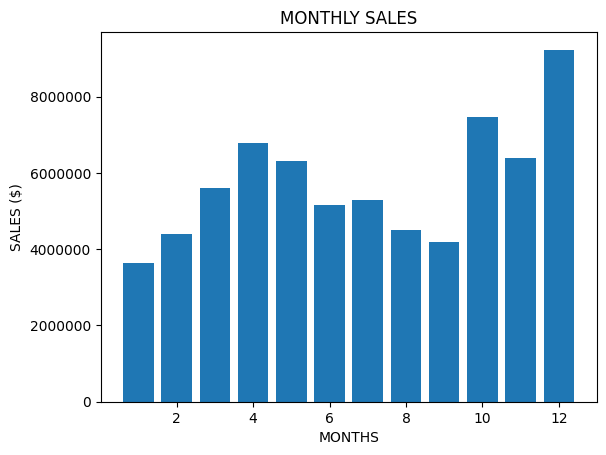

In [ ]:
plt.bar(all_month_sales.index , all_month_sales.values)
plt.xlabel('MONTHS')
plt.ylabel('SALES ($)')
plt.title('MONTHLY SALES')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Q2 -------> WHAT CITY SOLD THE MOST PRODUCT

In [ ]:
most_product_city = df.groupby('City')['Quantity Ordered'].sum().idxmax()
most_product_city


' San Francisco'

Q3 ------------> WHICH CITY BOUGHT WHICH PRODUCT THE MOST

In [ ]:
most_prouct_bought_by_city = df.groupby(['City' , 'Product'])['Quantity Ordered'].sum().sort_values(ascending=False)
most_prouct_bought_by_city

City           Product                 
San Francisco  AAA Batteries (4-pack)      14816
               AA Batteries (4-pack)       13110
               USB-C Charging Cable        11788
               Lightning Charging Cable    11114
Los Angeles    AAA Batteries (4-pack)       9934
                                           ...  
Dallas         LG Washing Machine            102
               LG Dryer                       88
Portland       LG Washing Machine             74
               LG Dryer                       74
Austin         LG Washing Machine             52
Name: Quantity Ordered, Length: 171, dtype: int64

****

**Q4 --------> PRODUCT WHICH IS SOLD THE MOST AND WHY**

In [ ]:
most_product_sold = df.groupby('Product')['Quantity Ordered'].sum().idxmax()
most_product_sold

'AAA Batteries (4-pack)'

Q5 -----------> BEST TIME TO ADVERTISE

In [ ]:
best_time_to_advertise = df.groupby('Time')['Quantity Ordered'].sum().idxmax()
print(best_time_to_advertise)



11:58:00


Q6 ---------> WHICH PRODUCT IS SOLVED MOST EACH MONTH

In [ ]:
product_sold_each_month= df.groupby(['Product' , 'Month'])['Quantity Ordered'].sum().reset_index()
product_sold_each_month



,Product,Month,Quantity Ordered
0,20in Monitor,1,436
1,20in Monitor,2,492
2,20in Monitor,3,652
3,20in Monitor,4,786
4,20in Monitor,5,682
...,...,...,...
223,iPhone,8,878
224,iPhone,9,794
225,iPhone,10,1432
226,iPhone,11,1330


**BEST PRODUCT EACH MONTH**

In [ ]:
# NOW BEST PRDUCT SOLD EACH MONTH
best_product_each_month = product_sold_each_month.loc[product_sold_each_month.groupby('Month')['Quantity Ordered'].idxmax()]

best_product_each_month

,Product,Month,Quantity Ordered
60,AAA Batteries (4-pack),1,3200
61,AAA Batteries (4-pack),2,3944
62,AAA Batteries (4-pack),3,4958
63,AAA Batteries (4-pack),4,5878
64,AAA Batteries (4-pack),5,5854
65,AAA Batteries (4-pack),6,4324
66,AAA Batteries (4-pack),7,4730
67,AAA Batteries (4-pack),8,4042
68,AAA Batteries (4-pack),9,3846
69,AAA Batteries (4-pack),10,6726


BAR PLOT

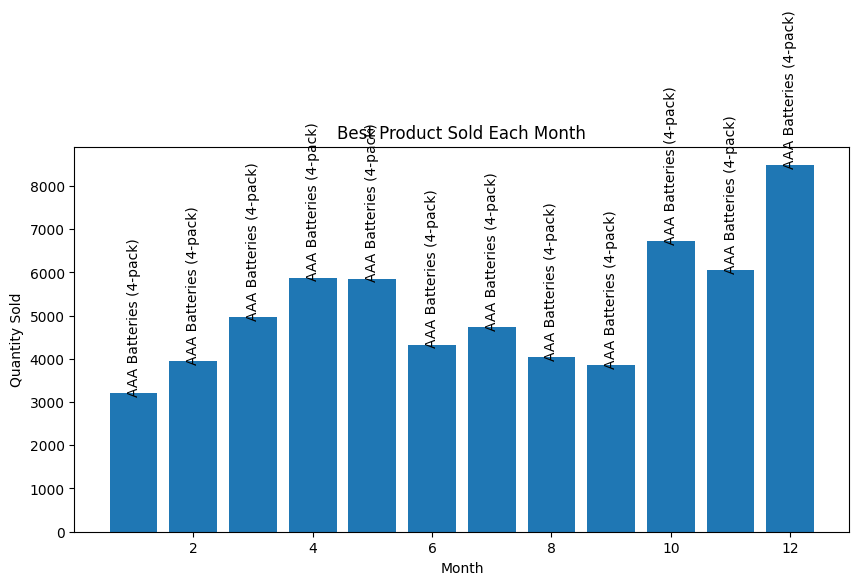

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(best_product_each_month['Month'], best_product_each_month['Quantity Ordered'])

for i in range(len(best_product_each_month)):
    plt.text(
        best_product_each_month['Month'].iloc[i],
        best_product_each_month['Quantity Ordered'].iloc[i],
        best_product_each_month['Product'].iloc[i],
        ha='center',
        rotation=90
    )

plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Best Product Sold Each Month')

plt.show()


**WORST PRODUCT EACH MONTH**

In [ ]:
worst_product_each_month = product_sold_each_month.loc[
    product_sold_each_month.groupby('Month')['Quantity Ordered'].idxmin()
]

worst_product_each_month


,Product,Month,Quantity Ordered
120,LG Dryer,1,78
121,LG Dryer,2,76
122,LG Dryer,3,98
135,LG Washing Machine,4,122
136,LG Washing Machine,5,128
125,LG Dryer,6,86
138,LG Washing Machine,7,104
127,LG Dryer,8,92
128,LG Dryer,9,60
129,LG Dryer,10,100


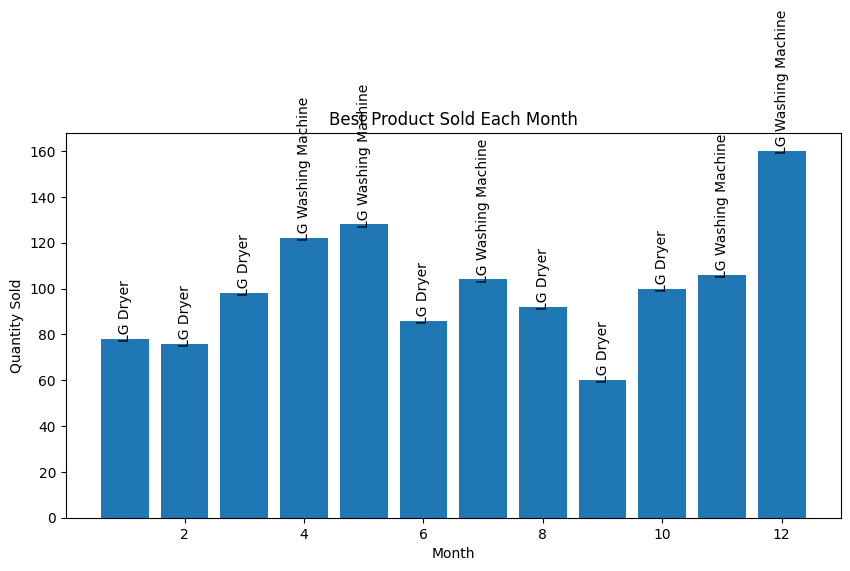

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(worst_product_each_month['Month'], worst_product_each_month['Quantity Ordered'])

for i in range(len(best_product_each_month)):
    plt.text(
        worst_product_each_month['Month'].iloc[i],
        worst_product_each_month['Quantity Ordered'].iloc[i],
        worst_product_each_month['Product'].iloc[i],
        ha='center',
        rotation=90
    )

plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Best Product Sold Each Month')

plt.show()


SAVE TO GITHUB
